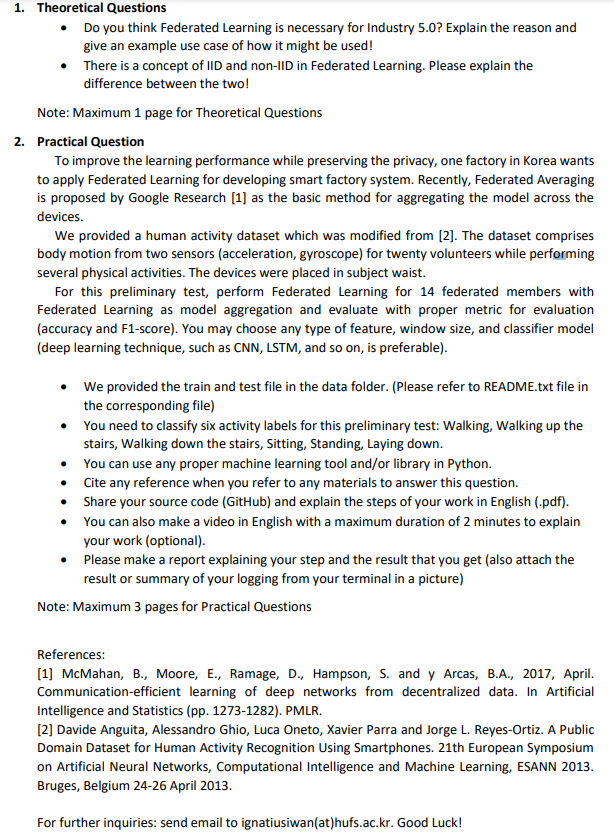

----------------------------------------------- Data Summary ---------------------------------------------------------
<br>
This dataset contains 20 subjects that are recorded doing various activity. Each subject was recorded using
2 accelerometers and 1 gyroscope. There are 6 activities that are described in this dataset , which are :

1. Walking activity
2. Walking up the stairs activity
3. Walking down the stairs activity
4. Sitting activity
5. Standing activity
6. Laying down activity

The training contains 14 subjects (train.csv) , while the rest is used for testing (test.csv) . The columns for the
CSV is described as follows:

Column 1: Subject id
Column 2: Acceleration value from accelerometer 1 in x axis.
Column 3: Acceleration value from accelerometer 1 in y axis.
Column 4: Acceleration value from accelerometer 1 in z axis.
Column 5: Gyro value from gyroscope 1 in x axis.
Column 6: Gyro value from gyroscope 1 in y axis.
Column 7: Gyro value from gyroscope 1 in z axis.
Column 8: Acceleration value from accelerometer 2 in x axis.
Column 9: Acceleration value from accelerometer 2 in y axis.
Column 10: Acceleration value from accelerometer 2 in z axis.
Column 11: Label 
-------------------------------------------------------------------------------------------------------------------------


# Import

In [1]:
import pandas as pd
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
# Data Training
dataTrain = pd.read_csv("train.csv")
dataTrain.head()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,3,-0.049573,0.051482,0.061498,0.357428,0.876525,-1.077288,0.951736,-0.303094,-0.133766,5
1,3,-0.085298,0.048648,0.083263,0.337020,0.840771,-1.329607,0.918129,-0.301953,-0.111281,5
2,3,-0.046568,0.057793,0.114970,0.320000,0.909147,-0.788201,0.958863,-0.288855,-0.078756,5
3,3,0.001564,0.068723,0.144465,0.308596,0.773221,-0.313850,1.008886,-0.274002,-0.048346,5
4,3,-0.026644,0.088834,0.188589,0.308176,0.691534,-0.457948,0.982454,-0.250003,-0.003217,5


In [3]:
# Data Training
dataTest = pd.read_csv("test.csv")
dataTest.head()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,2,0.011653,-0.029399,0.106826,0.437464,0.531349,0.136528,1.041216,-0.269796,0.023780,5
1,2,0.013109,-0.039729,0.152455,0.468264,0.721069,0.097622,1.041803,-0.280025,0.076293,5
2,2,0.011269,-0.052406,0.216846,0.498257,0.520328,0.083556,1.039086,-0.292663,0.147475,5
3,2,0.027831,-0.052106,0.202581,0.479396,0.372625,0.022861,1.054768,-0.292384,0.139906,5
4,2,0.002318,-0.045470,0.176010,0.389894,0.414541,-0.025939,1.028376,-0.285826,0.119934,5


### Data Visualization
The main goal of data visulization is to make it easier to identify patterns, trends and outliers in large data sets

In [4]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528256 entries, 0 to 528255
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   subject  528256 non-null  int64  
 1   acc1_x   528256 non-null  float64
 2   acc1_y   528256 non-null  float64
 3   acc1_z   528256 non-null  float64
 4   gyro1_x  528256 non-null  float64
 5   gyro1_y  528256 non-null  float64
 6   gyro1_z  528256 non-null  float64
 7   acc2_x   528256 non-null  float64
 8   acc2_y   528256 non-null  float64
 9   acc2_z   528256 non-null  float64
 10  label    528256 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 44.3 MB


In [5]:
print('Check for NaN/Null value in data train = {}'.format(dataTest.isnull().values.sum()))
print('No of duplicates in train: {}'.format(sum(dataTrain.duplicated())))

Check for NaN/Null value in data train = 0
No of duplicates in train: 213249


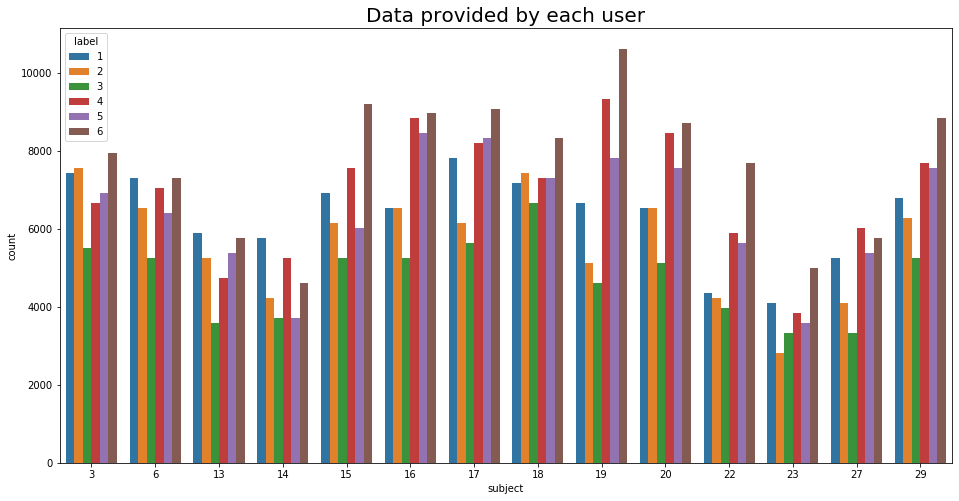

In [6]:
# Visualization graph for each user's data, aims to check for imbalance data
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='label', data = dataTrain)
plt.show()

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.drop(['label'], axis=1).shape,train.label.shape

((528256, 10), (528256,))

In [8]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X1, y1 = oversample.fit_resample(train.drop(['label'], axis=1),train.label)

In [9]:
X1['label'] = y1

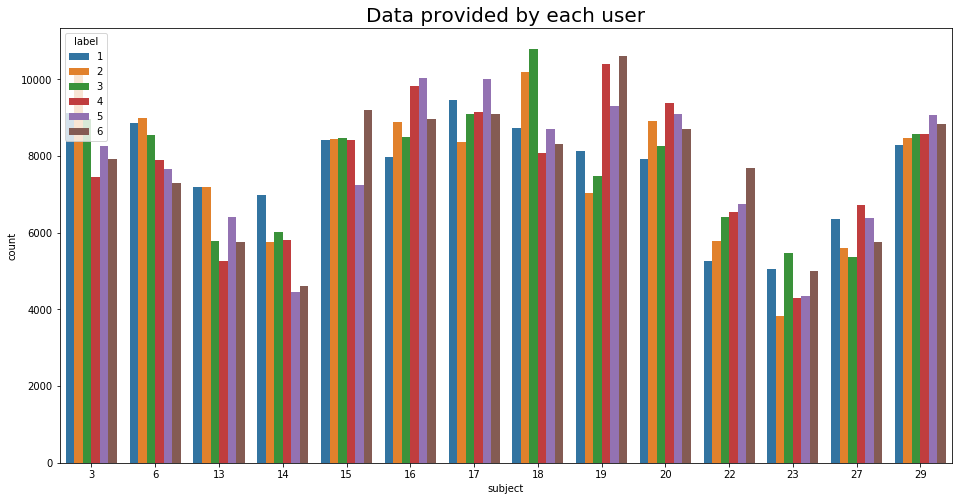

In [10]:
# Visualization graph for each user's data, aims to check for imbalance data
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='label', data = X1)
plt.show()

In [11]:
y_train_smote = X1.label
X_train_smote = X1.drop(['subject', 'label'], axis=1)
y_test_smote = test.label
X_test_smote = test.drop(['subject', 'label'], axis=1)
print('Training data size : ', X_train_smote.shape)
print('Test data size : ', X_test_smote.shape)

Training data size :  (646656, 9)
Test data size :  (263424, 9)


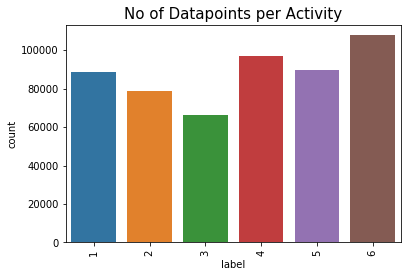

In [5]:
#  Graph for No of Datapoints per Activity
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(dataTrain.label)
plt.xticks(rotation=90)
plt.show()

EDA

In [31]:
sns.set_palette("Set1", desat=0.80)

# Distplot

##  Plotting Graph for acc1_x

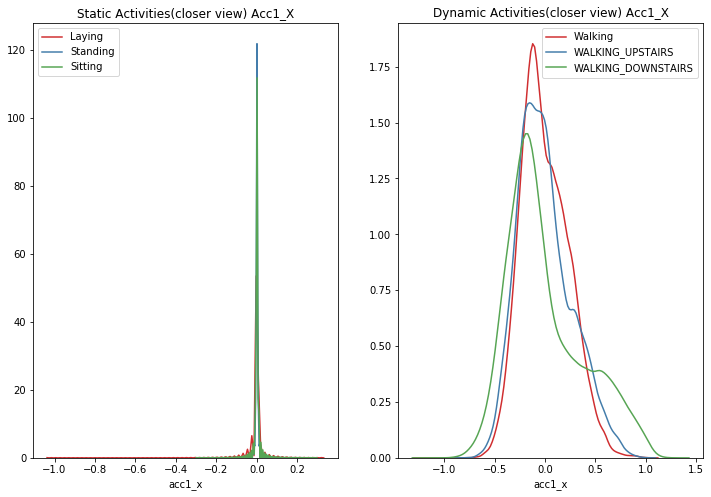

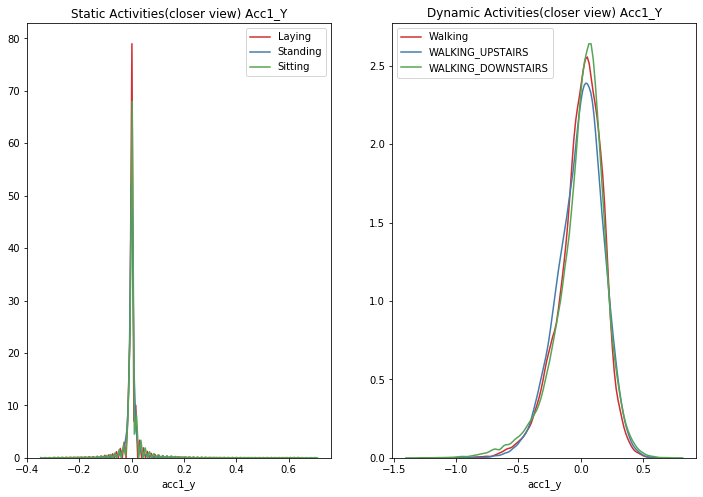

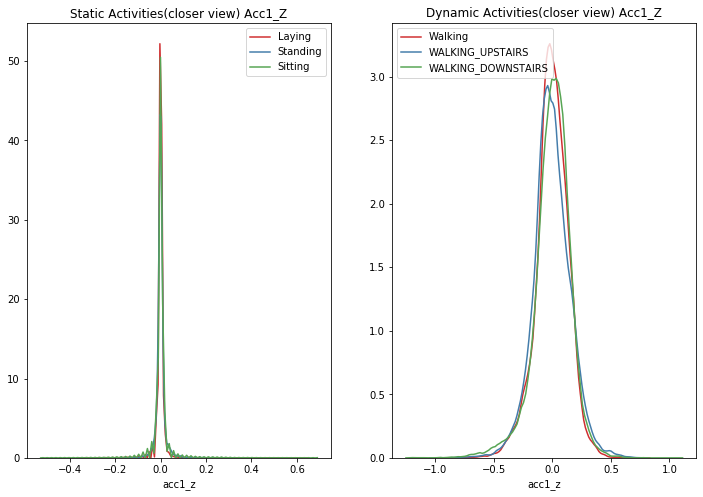

In [115]:
#  Plotting Graph for acc1_x
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view) Acc1_X")
sns.distplot(dataTrain[dataTrain["label"]==6]['acc1_x'],hist = False, label = 'Laying')
sns.distplot(dataTrain[dataTrain["label"]==5]['acc1_x'],hist = False,label = 'Standing')
sns.distplot(dataTrain[dataTrain["label"]==4]['acc1_x'],hist = False, label = 'Sitting')

# Dynamic Activities(closer view)
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view) Acc1_X")
sns.distplot(dataTrain[dataTrain["label"]==1]['acc1_x'],hist = False, label = 'Walking')
sns.distplot(dataTrain[dataTrain["label"]==2]['acc1_x'],hist = False,label = 'WALKING_UPSTAIRS')
sns.distplot(dataTrain[dataTrain["label"]==3]['acc1_x'],hist = False, label = 'WALKING_DOWNSTAIRS')

#  Plotting Graph for acc1_y
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view) Acc1_Y")
sns.distplot(dataTrain[dataTrain["label"]==6]['acc1_y'],hist = False, label = 'Laying')
sns.distplot(dataTrain[dataTrain["label"]==5]['acc1_y'],hist = False,label = 'Standing')
sns.distplot(dataTrain[dataTrain["label"]==4]['acc1_y'],hist = False, label = 'Sitting')
# plt.axis([-1.02, 0.5, 0, 35])

# Dynamic Activities(closer view)
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view) Acc1_Y")
sns.distplot(dataTrain[dataTrain["label"]==1]['acc1_y'],hist = False, label = 'Walking')
sns.distplot(dataTrain[dataTrain["label"]==2]['acc1_y'],hist = False,label = 'WALKING_UPSTAIRS')
sns.distplot(dataTrain[dataTrain["label"]==3]['acc1_y'],hist = False, label = 'WALKING_DOWNSTAIRS')


#  Plotting Graph for acc1_x
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view) Acc1_Z")
sns.distplot(dataTrain[dataTrain["label"]==6]['acc1_z'],hist = False, label = 'Laying')
sns.distplot(dataTrain[dataTrain["label"]==5]['acc1_z'],hist = False,label = 'Standing')
sns.distplot(dataTrain[dataTrain["label"]==4]['acc1_z'],hist = False, label = 'Sitting')

# Dynamic Activities(closer view)
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view) Acc1_Z")
sns.distplot(dataTrain[dataTrain["label"]==1]['acc1_z'],hist = False, label = 'Walking')
sns.distplot(dataTrain[dataTrain["label"]==2]['acc1_z'],hist = False,label = 'WALKING_UPSTAIRS')
sns.distplot(dataTrain[dataTrain["label"]==3]['acc1_z'],hist = False, label = 'WALKING_DOWNSTAIRS')

## Plotting Graph for gyro1_x

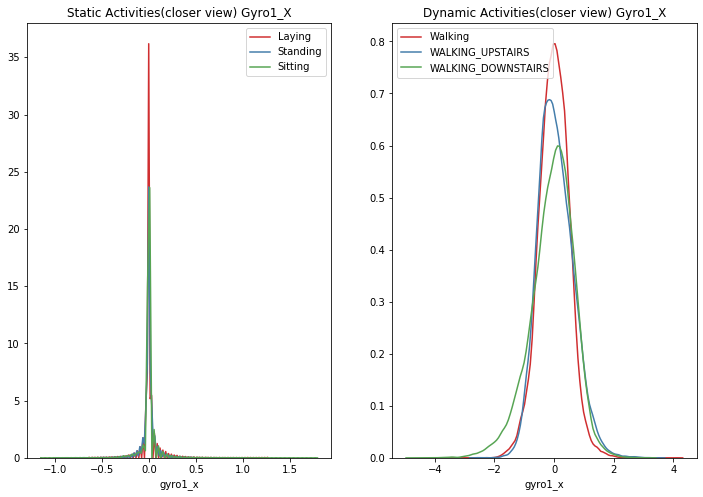

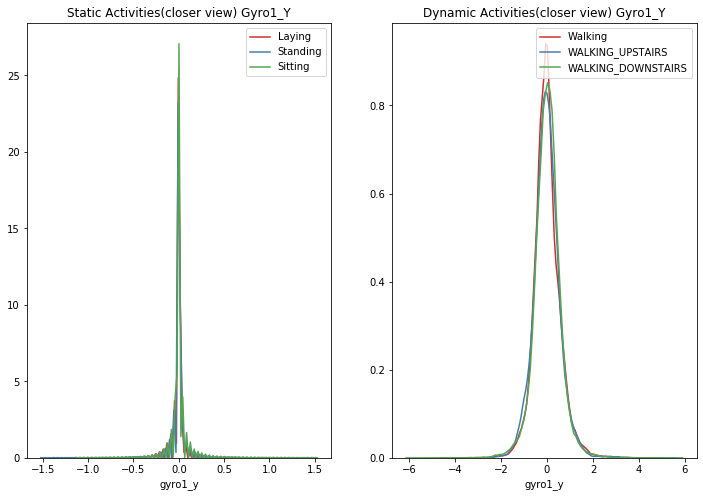

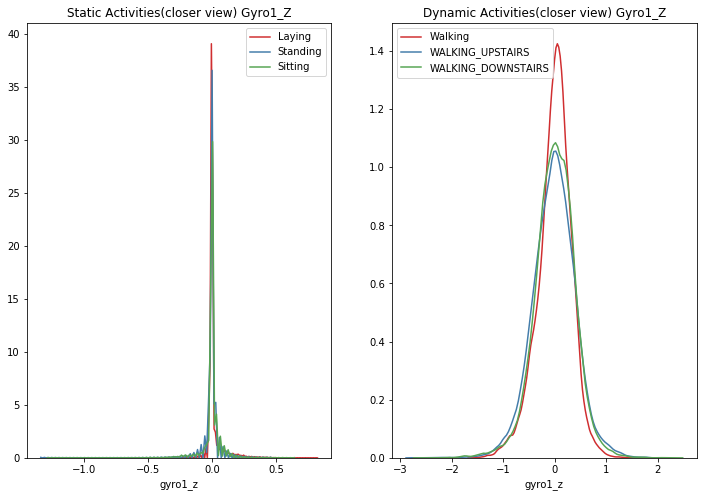

In [119]:
#  Plotting Graph for acc1_z
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view) Gyro1_X")
sns.distplot(dataTrain[dataTrain["label"]==6]['gyro1_x'],hist = False, label = 'Laying')
sns.distplot(dataTrain[dataTrain["label"]==5]['gyro1_x'],hist = False,label = 'Standing')
sns.distplot(dataTrain[dataTrain["label"]==4]['gyro1_x'],hist = False, label = 'Sitting')
# plt.axis([-1.02, 0.5, 0, 35])

# Dynamic Activities(closer view)
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view) Gyro1_X")
sns.distplot(dataTrain[dataTrain["label"]==1]['gyro1_x'],hist = False, label = 'Walking')
sns.distplot(dataTrain[dataTrain["label"]==2]['gyro1_x'],hist = False,label = 'WALKING_UPSTAIRS')
sns.distplot(dataTrain[dataTrain["label"]==3]['gyro1_x'],hist = False, label = 'WALKING_DOWNSTAIRS')


#  Plotting Graph for acc1_z
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view) Gyro1_Y")
sns.distplot(dataTrain[dataTrain["label"]==6]['gyro1_y'],hist = False, label = 'Laying')
sns.distplot(dataTrain[dataTrain["label"]==5]['gyro1_y'],hist = False,label = 'Standing')
sns.distplot(dataTrain[dataTrain["label"]==4]['gyro1_y'],hist = False, label = 'Sitting')
# plt.axis([-1.02, 0.5, 0, 35])

# Dynamic Activities(closer view)
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view) Gyro1_Y")
sns.distplot(dataTrain[dataTrain["label"]==1]['gyro1_y'],hist = False, label = 'Walking')
sns.distplot(dataTrain[dataTrain["label"]==2]['gyro1_y'],hist = False,label = 'WALKING_UPSTAIRS')
sns.distplot(dataTrain[dataTrain["label"]==3]['gyro1_y'],hist = False, label = 'WALKING_DOWNSTAIRS')


#  Plotting Graph for acc1_z
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view) Gyro1_Z")
sns.distplot(dataTrain[dataTrain["label"]==6]['gyro1_z'],hist = False, label = 'Laying')
sns.distplot(dataTrain[dataTrain["label"]==5]['gyro1_z'],hist = False,label = 'Standing')
sns.distplot(dataTrain[dataTrain["label"]==4]['gyro1_z'],hist = False, label = 'Sitting')
# plt.axis([-1.02, 0.5, 0, 35])

# Dynamic Activities(closer view)
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view) Gyro1_Z")
sns.distplot(dataTrain[dataTrain["label"]==1]['gyro1_z'],hist = False, label = 'Walking')
sns.distplot(dataTrain[dataTrain["label"]==2]['gyro1_z'],hist = False,label = 'WALKING_UPSTAIRS')
sns.distplot(dataTrain[dataTrain["label"]==3]['gyro1_z'],hist = False, label = 'WALKING_DOWNSTAIRS')

## Plotting Graph for acc2_X

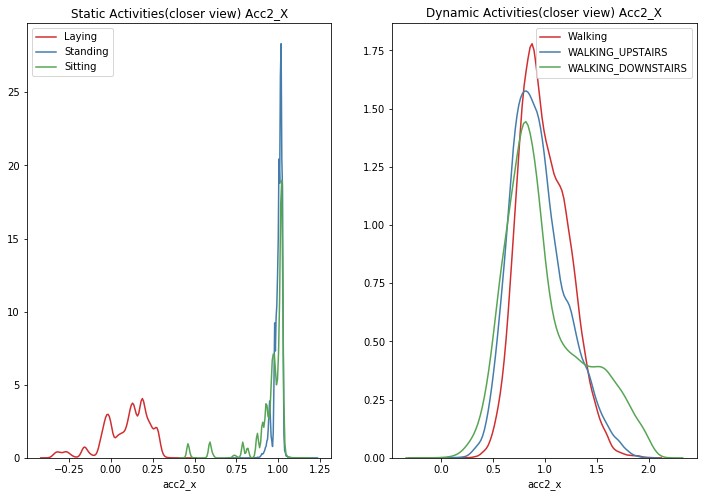

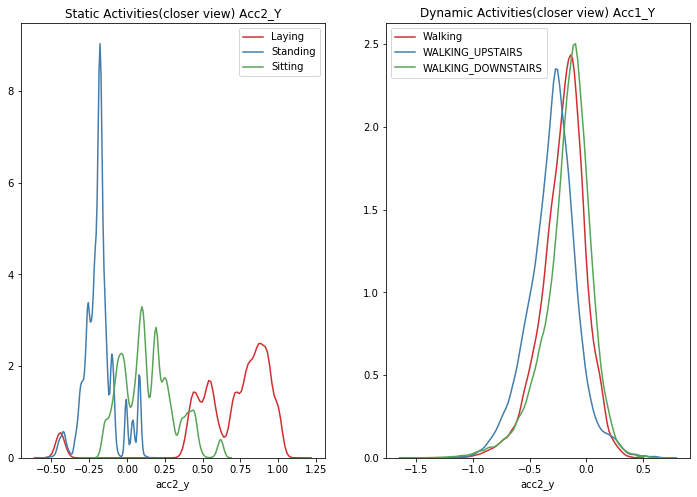

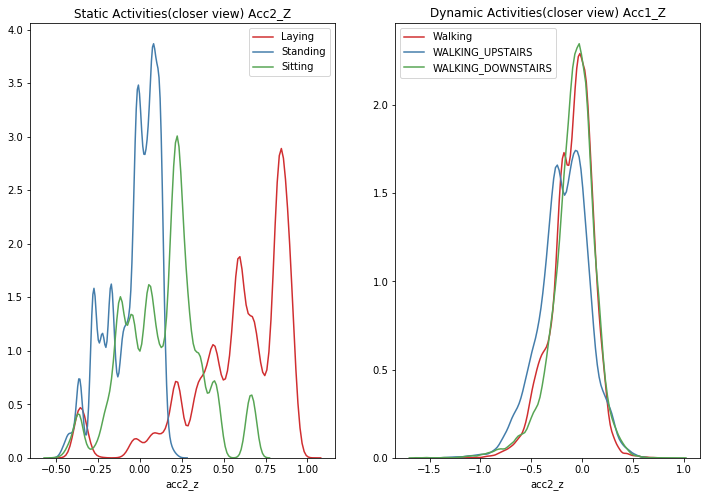

In [117]:
#  Plotting Graph for acc1_y
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view) Acc2_X")
sns.distplot(dataTrain[dataTrain["label"]==6]['acc2_x'],hist = False, label = 'Laying')
sns.distplot(dataTrain[dataTrain["label"]==5]['acc2_x'],hist = False,label = 'Standing')
sns.distplot(dataTrain[dataTrain["label"]==4]['acc2_x'],hist = False, label = 'Sitting')
# plt.axis([-1.02, 0.5, 0, 35])

# Dynamic Activities(closer view)
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view) Acc2_X")
sns.distplot(dataTrain[dataTrain["label"]==1]['acc2_x'],hist = False, label = 'Walking')
sns.distplot(dataTrain[dataTrain["label"]==2]['acc2_x'],hist = False,label = 'WALKING_UPSTAIRS')
sns.distplot(dataTrain[dataTrain["label"]==3]['acc2_x'],hist = False, label = 'WALKING_DOWNSTAIRS')


#  Plotting Graph for acc1_z
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view) Acc2_Y")
sns.distplot(dataTrain[dataTrain["label"]==6]['acc2_y'],hist = False, label = 'Laying')
sns.distplot(dataTrain[dataTrain["label"]==5]['acc2_y'],hist = False,label = 'Standing')
sns.distplot(dataTrain[dataTrain["label"]==4]['acc2_y'],hist = False, label = 'Sitting')
# plt.axis([-1.02, 0.5, 0, 35])

# Dynamic Activities(closer view)
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view) Acc1_Y")
sns.distplot(dataTrain[dataTrain["label"]==1]['acc2_y'],hist = False, label = 'Walking')
sns.distplot(dataTrain[dataTrain["label"]==2]['acc2_y'],hist = False,label = 'WALKING_UPSTAIRS')
sns.distplot(dataTrain[dataTrain["label"]==3]['acc2_y'],hist = False, label = 'WALKING_DOWNSTAIRS')


#  Plotting Graph for acc1_z
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view) Acc2_Z")
sns.distplot(dataTrain[dataTrain["label"]==6]['acc2_z'],hist = False, label = 'Laying')
sns.distplot(dataTrain[dataTrain["label"]==5]['acc2_z'],hist = False,label = 'Standing')
sns.distplot(dataTrain[dataTrain["label"]==4]['acc2_z'],hist = False, label = 'Sitting')
# plt.axis([-1.02, 0.5, 0, 35])

# Dynamic Activities(closer view)
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view) Acc1_Z")
sns.distplot(dataTrain[dataTrain["label"]==1]['acc2_z'],hist = False, label = 'Walking')
sns.distplot(dataTrain[dataTrain["label"]==2]['acc2_z'],hist = False,label = 'WALKING_UPSTAIRS')
sns.distplot(dataTrain[dataTrain["label"]==3]['acc2_z'],hist = False, label = 'WALKING_DOWNSTAIRS')

# Boxplot

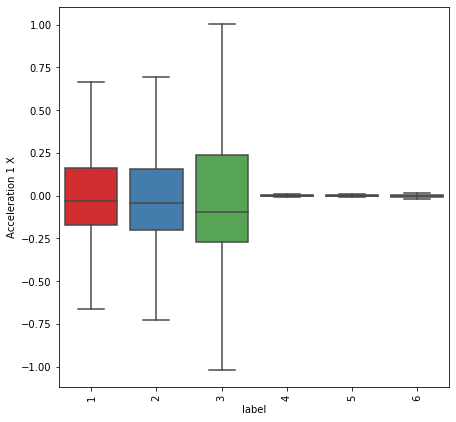

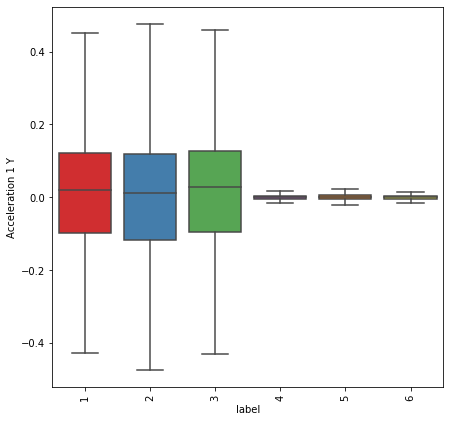

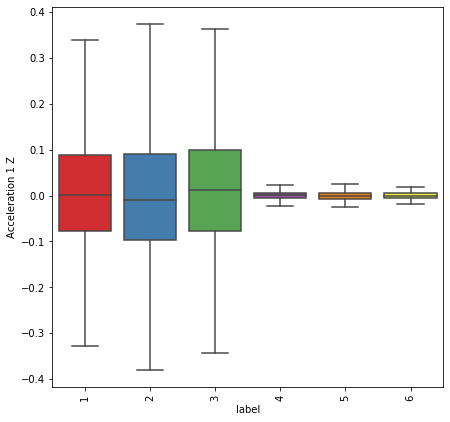

In [111]:
plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='acc1_x',data=dataTrain, showfliers=False, saturation=1)
plt.ylabel('Acceleration 1 X')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='acc1_y',data=dataTrain, showfliers=False, saturation=1)
plt.ylabel('Acceleration 1 Y')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='acc1_z',data=dataTrain, showfliers=False, saturation=1)
plt.ylabel('Acceleration 1 Z')
plt.xticks(rotation=90)
plt.show()

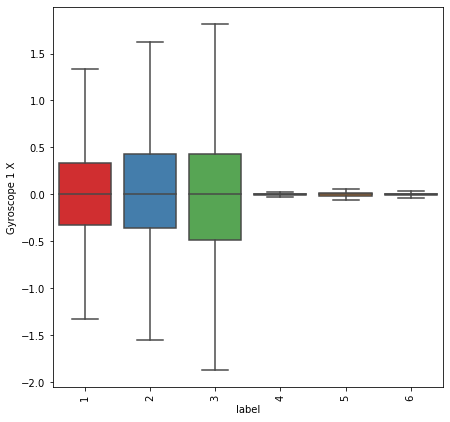

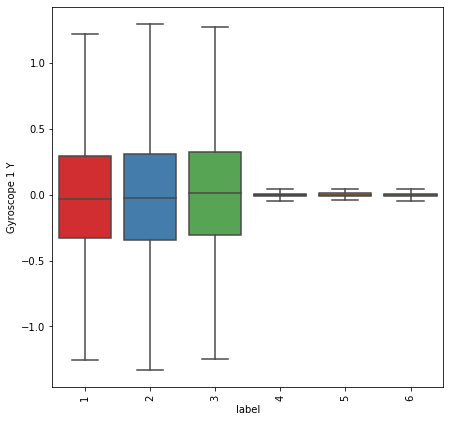

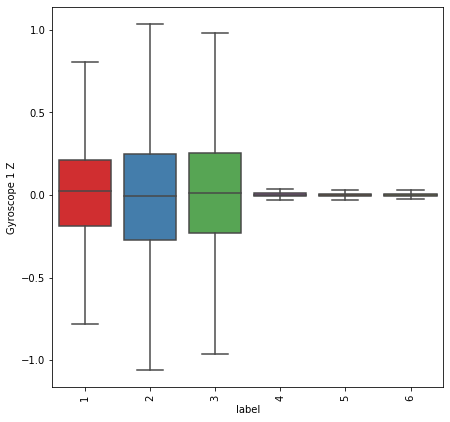

In [113]:
plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='gyro1_x',data=dataTrain, showfliers=False, saturation=1)
plt.ylabel('Gyroscope 1 X')
# plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
# plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='gyro1_y',data=dataTrain, showfliers=False, saturation=1)
plt.ylabel('Gyroscope 1 Y')
# plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
# plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='gyro1_z',data=dataTrain, showfliers=False, saturation=1)
plt.ylabel('Gyroscope 1 Z')
# plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
# plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

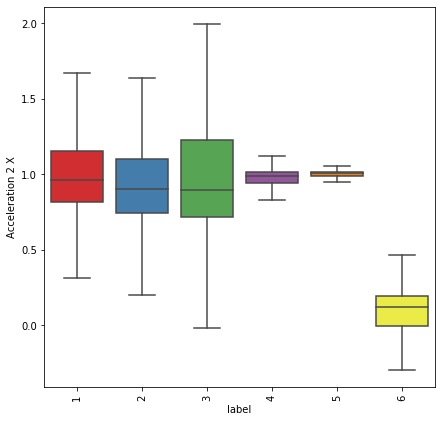

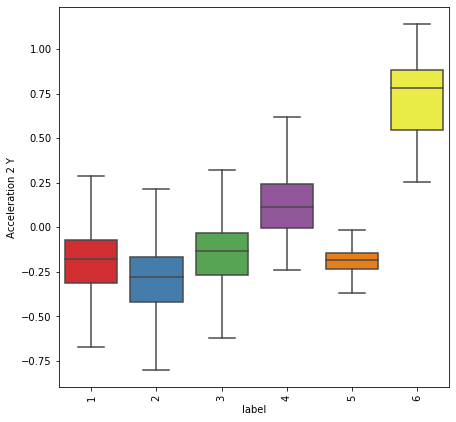

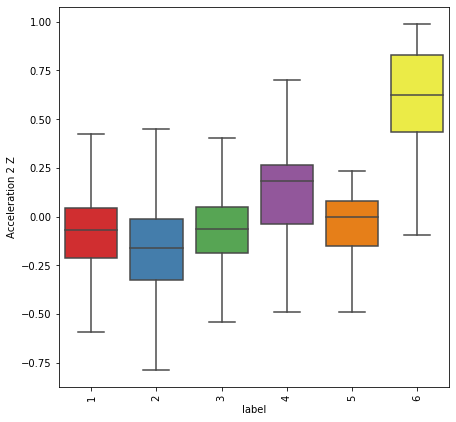

In [112]:
plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='acc2_x',data=dataTrain, showfliers=False, saturation=1)
plt.ylabel('Acceleration 2 X')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='acc2_y',data=dataTrain, showfliers=False, saturation=1)
plt.ylabel('Acceleration 2 Y')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='acc2_z',data=dataTrain, showfliers=False, saturation=1)
plt.ylabel('Acceleration 2 Z')
plt.xticks(rotation=90)
plt.show()

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [13]:
y_train = train.label
X_train = train.drop(['subject', 'label'], axis=1)
y_test = test.label
X_test = test.drop(['subject', 'label'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (528256, 9)
Test data size :  (263424, 9)


In [144]:
X_train.head(3)

,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z
0,-0.049573,0.051482,0.061498,0.357428,0.876525,-1.077288,0.951736,-0.303094,-0.133766
1,-0.085298,0.048648,0.083263,0.337020,0.840771,-1.329607,0.918129,-0.301953,-0.111281
2,-0.046568,0.057793,0.114970,0.320000,0.909147,-0.788201,0.958863,-0.288855,-0.078756


In [145]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV